NOTE: *This notebook was originally conceived by Prof. Sune Lehmann, for the Social data analysis and visualization (02806) course. It is a very nice course that we encourage you do, and complements well with our course.* 

# Week 1

## Overview

Today we'll be working through Chapters 5,6 (and 7, 8) in _Data Science from Scratch_. This is all stuff that you should know about - but since we're doing everything from scratch this semester, we think it's good to refresh those topics. 

We'll have a couple of exercises for each chapter - some will just require you to write down some thoughts on paper, others will require some calculations.

In addition to this, we'll also practice plotting a bit more (this is a course on data visualization after all), and we'll start the whole thing off with some practical information.

## Part 1: Algebra in Numpy

In order to continue, you need to get comfortable with vector and matrix manipulation in Numpy, a very handy Python package.

### NumPy

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

You can read more about NumPy [here](https://docs.scipy.org/doc/numpy/user/whatisnumpy.html)

#### Why NumPy???

* **Memory efficiency:** NumPy's arrays are more compact than Python lists. For example, where a Python list would take at least 20 MB, a NumPy 3D array with single-precision floats in the cells would fit in 4 MB. Access in reading and writing items is also faster with NumPy.

* **Conveniency:** You get a lot of vector and matrix operations for free, which sometimes allow one to avoid unnecessary work. And they are also efficiently implemented.

* **Speed:** Here's a test on doing a sum over a list and a NumPy array, showing that the sum on the NumPy array is 10x faster.

In [2]:
from numpy import arange
from timeit import Timer

Nelements = 10000
Ntimeits = 10000

x = arange(Nelements)     #the "new" arange function in Python, creates an array with Nelements
y = range(Nelements)      #the "old" one you know already, creates a list with Nelements

t_numpy = Timer("x.sum()", "from __main__ import x")    #a simple operation on the array created
t_list = Timer("sum(y)", "from __main__ import y")      #a similar operation but on a list
print ("numpy: %.3e" % (t_numpy.timeit(Ntimeits)/Ntimeits,))
print ("list:  %.3e" % (t_list.timeit(Ntimeits)/Ntimeits,))

numpy: 5.659e-06
list:  1.124e-04


### The Basics

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers.

<p>
<img src="https://www.safaribooksonline.com/library/view/elegant-scipy-1st/9781491922927/assets/elsp_0105.png"/>
</p>
<p>

In [3]:
import numpy as np

### Creating arrays
a = np.array([1,2,3])
b = np.array([(1.5,2,3), (4,5,6)], dtype=float)

#### Initial Placeholders 
(or ways to quickly create a vector/array with ones or zeros...)

In [3]:
np.zeros([3,4])                    # Creates an 3x4 array of zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
np.ones((2,3,4), dtype=np.int16)   # Creates a array of 2x3x4 ones

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [5]:
np.arange(10,30,5)                  # Creates an array of evenly spaced values (step value)

array([10, 15, 20, 25])

In [6]:
np.linspace(0,2,9)                 # Creates an array of evenly spaced values (number of samples)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [7]:
np.full((2,2),7)                    # Creates an array of constants

array([[7, 7],
       [7, 7]])

In [8]:
np.eye(2)                           # Creates a 2x2 identity matrix

array([[1., 0.],
       [0., 1.]])

In [9]:
np.random.random((2,2))             # Creates an array of random values

array([[0.91133256, 0.12851746],
       [0.16986133, 0.41523242]])

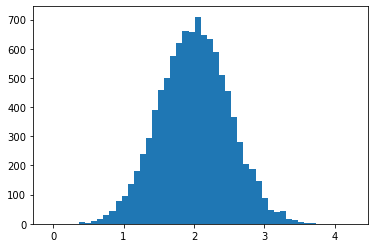

In [10]:
import matplotlib.pyplot as plt

# Build a vector of 10000 samples from a normal distribution with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5   

v = np.random.normal(mu,sigma,10000)   #get 100000 samples from a normal
# Plot a histogram with 50 bins
plt.hist(v, bins=50)       # matplotlib version (plot)
plt.show()

In [11]:
np.empty((3,2))                     # Creates an empty array

array([[17.2, 17.2],
       [17.2, 17.2],
       [17.2, 24.2]])

### Saving and loading text files

In [12]:
a = np.array([1,2,3])
np.savetxt("myarray.txt", a, delimiter=" ")
loaded_a=np.loadtxt("myarray.txt")  #reads directly to an np.array
print(loaded_a)

[1. 2. 3.]


In [13]:
f=open("myarray.txt") #read it as if it was a normal text file
for line in f.readlines():
    print(line)

1.000000000000000000e+00

2.000000000000000000e+00

3.000000000000000000e+00



### Indexing, Slicing and Iterating

In [14]:
a = np.arange(10)**3   #power operator
print(a)

[  0   1   8  27  64 125 216 343 512 729]


In [15]:
print(a[2])
print(a[2:5])
print(a[ : :-1])      # reversed a

for i in a:
    print(i**(1/3.))

8
[ 8 27 64]
[729 512 343 216 125  64  27   8   1   0]
0.0
1.0
2.0
3.0
3.9999999999999996
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


In [16]:
# Two dimensional arrays
print(b)
print(b[:1])       # prints the first row
print(b[0:2,1])    # prints the second column

[[1.5 2.  3. ]
 [4.  5.  6. ]]
[[1.5 2.  3. ]]
[2. 5.]


In [17]:
a[a<2]            # Selection of elements from "a" less than 2

array([0, 1])

### Array Manipulation

In [18]:
print(b)
print(b.T) # Transposing Array (you could also do np.transpose(b))

[[1.5 2.  3. ]
 [4.  5.  6. ]]
[[1.5 4. ]
 [2.  5. ]
 [3.  6. ]]


In [19]:
# Changing array Shape
b=b.ravel()               # b becomes flatenned (all elements in a single row)
print(b)
b=b.reshape(2,3)     #let's get it back to the initial 2x3 form
print(b)           #and here it is

[1.5 2.  3.  4.  5.  6. ]
[[1.5 2.  3. ]
 [4.  5.  6. ]]


In [20]:
# Adding/Removing elements
c=np.append(a,b)
print(c)

[  0.    1.    8.   27.   64.  125.  216.  343.  512.  729.    1.5   2.
   3.    4.    5.    6. ]


In [21]:
np.insert(c, 3, 5) #insert number 5 in position 3 of array c

array([  0. ,   1. ,   8. ,   5. ,  27. ,  64. , 125. , 216. , 343. ,
       512. , 729. ,   1.5,   2. ,   3. ,   4. ,   5. ,   6. ])

In [22]:
print(c) #before
c=np.delete(c, 3) #removes the fourth element in array
print(c) #after

[  0.    1.    8.   27.   64.  125.  216.  343.  512.  729.    1.5   2.
   3.    4.    5.    6. ]
[  0.    1.    8.   64.  125.  216.  343.  512.  729.    1.5   2.    3.
   4.    5.    6. ]


In [23]:
# Combining arrays
np.concatenate((b,b), axis=0)

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ],
       [1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [24]:
np.vstack((b,b))   #Try hstack()!

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ],
       [1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

## Part 2: Statistics (DSFS Chapter 5)

> _Reading_. Let's get cracking. Pick up DSFS and
> 
> * Read chapter 5\.
> 

The lessons here will be important throughout the course, so this is a good place for us to start the exercises. We start with some simple questions about the text. **Don't forget that you should be answering all exercises in an IPython notebook.**

> _Exercises_: Chapter 5 (just some questions from the text)
>
> * _Mean and median_: Explain the difference between the mean and the median in your own words. In what kinds of dataset are the mean and median similar? Can you think of a dataset where the mean and median would be very different?
> * _Variance_: Explain the variance in your own words.
> * _A paradox_: What is Simpson's Paradox. Provide your own example of a dataset where this issue occurs.
> * _Correlation and causation_: Explain what's funny about [**this comic**](https://xkcd.com/552/).

In my mind, statistics and visualization are intimately connected. If we plot data, we can usually learn a lot about the underlying statistics - sometimes things that are difficult to discern based on even quite sophisticated measures. Today's first Exercise illustrates this point.

> _Exercise_: Chapter 5 (beyond the book)
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
>
> It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

## Part 3: Probability  (DSFS Chapter 6)

> _Reading_: You guessed it! Have a look at DSFS Chapter 6.

Probability theory is another one of those topics that we'll glide past gently (since you probably remember everyting about if from another class), but we'll do a couple of fun ones just to

> _Exercise_: Conditional probability and having children.
>
> There's a nice example in the book where Joel illustrates the conditional probablity of “both children are girls” conditional on the event “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older sister is a girl" using the little code-snippet reproduced below. 

In [25]:
import random

def random_kid():
    return random.choice(["boy", "girl"])   #Uniform distribution, thus 50/50 of boy or girl...

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):       #Obtain a large sample (10000) 
    younger = random_kid()  # of 2 children families...
    older = random_kid() 
    
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
        

print("P(both | older): %f"%(both_girls / older_girl)) # 0.514 ~ 1/2 
print("P(both | either): %f"%(both_girls / either_girl)) # 0.342 ~ 1/3

P(both | older): 0.500709
P(both | either): 0.331190


> Let's imagine a new family with three children. Assuming that each child is equally likely to be a boy or a girl, and that the gender of each subsequent child is independent of the gender its older siblings. Use Python code to answer the following questions.
> * What is the probability of three girls?
> * What is the probability of two girls and one boy?
> * What is the probability of one girl and two boys?
> * What is the probability of three boys?
> * What is the probability that all children are girls given that the oldest child is a girl?
> * What is the probability that all children are girls given that one of the children is a girl?  
> * Work out the expected answer using your math skills.

> _Exercise_: Central limit theorem 

>The central limit theorem is fun because we can get Gaussian distributions from probability distributions that are _not_ Gaussian. Let's explore that in the following exercise.

> * Use Python's `random` module to simulate rolling a fair six-sided die 10 000 000 times.
> * Plot the distribution of dice rolls using a bar-chart. _Hint_: Use `counter` (see p. 24) to bin the values, then go back to Chapter 3 for examples of how to plot bar-charts (or try Google $\rightarrow$ _stackoverflow_).
> * Describe the shape of the distribution.
> * Now perform a new simulation. Roll a fair six-sided die 10 times and take the _average_. Do that 1 000 000 times.
> * Plot the distribution of those average values. This time you can't use `counter` (since the averages are not integer values). 
>  * Instead use `numpy.histogram` to bin those number into 25 bins. 
>  * What does the `numpy.histogram` function return? Do the two arrays have the same length?
>  * Then let's use `matplotlib.pyplot.bar` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Describe the shape of _this_ distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.
> * Calculate the mean $\mu$ and standard deviation $\sigma_{\textrm{observed}}$ of the averaged values. Could you have predicted these values by reading DSFS pp. 78-80?

### OPTIONAL: if you feel overwhelmed, do this section later

## Part 4: Hypothesis and inference  (DSFS Chapter 7)

> _Reading_: Take a look at DSFS Chapter 7. Maybe also just skim Chapter 8 to get a sense of what's going on.  

There's a lot going on in Chapter 7, enough for an entire course really, but my guess is that you guys are already getting tired, so the job is just to read through and get a sense of what's going on. In particular, I recommend taking a close look at the cental example about testing the fairness of a coin. That example nicely captures the cental concepts.

We'll return to the topic of inferencel later when we have an exercise that illustrates some of the concepts. For now, just a couple of questions to show that you've looked at the text.

> _Exercises_: Did you read the text?
>
> * What's the null hypothesis when testing if a coin is fair?
> * Explain in your own words what Joel means by _significance_ on p. 83.
> * Explain in your own words what Joel means by _power_ on p. 83.
> * Write down a short definition of $p$-value.
> * Explain the problem with $p$-hacking.